In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
pyplot.style.use('ggplot')


In [4]:
def vander_chebyshev(x, n=None):
    """Vandermonde matrix in Chebyshev basis."""
    if n is None:
        n = len(x)
    T = np.ones((len(x), n))
    if n > 1:
        T[:,1] = x
    for k in range(1,n-1):
        T[:,k+1] = 2* x * T[:,k] - T[:,k-1]
    return T

In [5]:

# xx is the range of data that will be predicted on
# x is the range of data to create the vandermonde basis?
def interp_and_eval_chebyshev(x, xx):
    """Compute the matrix that interpolates data at points x
    and evaluates the result at points xx.  Construct this
    similarly to interp_and_eval_monomial(), but use the
    Chebyshev polynomials instead of monomials.
    """
    # YOUR CODE HERE
    
    return vander_chebyshev(xx, len(x)) @ np.linalg.inv(vander_chebyshev(x))


def cosspace(a, b, n=50):
    return (a + b)/2 + (b - a)/2 * (np.cos(np.linspace(-np.pi, 0, n)))

In [6]:
# Known data I measured... it was tedious but whatever if it works...

# Measurements 1:
f = np.array([48.5,59.4,36.7,-1.8,-9.1,-1.3,18.5,52.6,54.6,49.3,48.3])
g = np.array([0,-2.2,-6.8,-19.3,-25.5,-21.2,-10.31,-3.6,-1.4,-0.5,-0.5])
x = np.array([0,10.8,24.4,44.7,66.9,89.02,109.4,123.0,133.8,143.8,152.3])
xNorm = x/(0.5*max(x))
xNorm -= 1
print(len(f),len(g),len(x),len(xNorm))
print(xNorm)


# Measurements 2:
f2 = np.array([47.1,47.07,47.25,48.12,
      59.04,45.91,14.6,-2.97,
      -9.24,-6.07,2.51,16.51,
      52.26,53.42,48.14,47.14,
      46.76,46.76,46.76,46.76])
g2 = np.array([0,0,0,0,-1.91,-5.98,
      -11.78,-20.97,-26.24,
      -24.02,-19.07,-10.57,
      -3.58,-1.19,0,0,0,0,0,0])
x2 = np.array([0,1.3,5.17,11.5,20.13,
      31.85,43.47,57.1,72.22,
      87.64,103.36,118.19,133.74,
      147.5,160.24,170.05,179.55,
      185.49,189.05,191])
x2Norm = x2/(0.5*max(x2))
x2Norm -= 1
print(len(f2),len(g2),len(x2),len(x2Norm))
print(x2Norm)



xCos = cosspace(-1,1,60)
print(xCos)


11 11 11 11
[-1.         -0.85817466 -0.67957978 -0.41300066 -0.12147078  0.16900854
  0.43663821  0.61523309  0.75705844  0.8883782   1.        ]
20 20 20 20
[-1.         -0.98638743 -0.94586387 -0.87958115 -0.78921466 -0.66649215
 -0.54481675 -0.40209424 -0.24376963 -0.08230366  0.08230366  0.23759162
  0.40041885  0.54450262  0.67790576  0.78062827  0.88010471  0.94230366
  0.97958115  1.        ]
[-1.         -0.9985827  -0.9943348  -0.98726835 -0.97740339 -0.96476787
 -0.94939761 -0.93133618 -0.91063477 -0.88735208 -0.86155408 -0.83331392
 -0.80271164 -0.76983398 -0.73477415 -0.69763152 -0.65851138 -0.61752461
 -0.57478741 -0.53042091 -0.48455087 -0.43730732 -0.38882418 -0.33923887
 -0.28869195 -0.2373267  -0.18528872 -0.13272553 -0.07978611 -0.02662052
  0.02662052  0.07978611  0.13272553  0.18528872  0.2373267   0.28869195
  0.33923887  0.38882418  0.43730732  0.48455087  0.53042091  0.57478741
  0.61752461  0.65851138  0.69763152  0.73477415  0.76983398  0.80271164
  0.83331392

(60, 20)


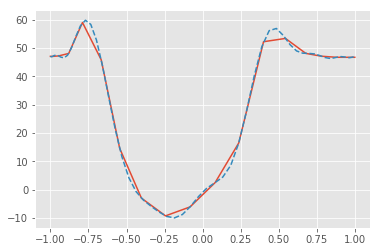

In [7]:
# Now to try and interpolate a 2D slice:
vonder_chevb = interp_and_eval_chebyshev(x2Norm,xCos)

print(np.shape(vonder_chevb))

pyplot.plot(x2Norm,f2)
pyplot.plot(xCos,vonder_chevb @ f2, "--")
pyplot.show()


In [ ]:
# now to interpolate the next function
pyplot.plot(x2Norm,g2)
pyplot.plot(xCos,vonder_chevb @ g2, "--")
pyplot.show()



In [ ]:
# Plot it all together
pyplot.plot(x2Norm,f2)
pyplot.plot(xCos,vonder_chevb @ f2, "--")

pyplot.plot(x2Norm,g2)
pyplot.plot(xCos,vonder_chevb @ g2, "--")

pyplot.show()

print(x2Norm)

In [ ]:
# Now to see if solving the vander matrix then using that to interpolate new points works...
v2Norm = vander_chebyshev(x2Norm)
print(np.shape(v2Norm),np.shape(f2))
tmp = np.linspace(-1,1,40)
# Find coeffs for the vander matrix that best solves the known data
c = np.linalg.solve(v2Norm,f2)
z = vander_chebyshev(tmp,len(f2)) @ c
print(np.shape(x2Norm),np.shape(z))

pyplot.plot(tmp,z,'--')


In [ ]:
# Measurements 2:
f3 = np.array([-9.24,-6.07, 2.51,16.51,52.26,53.42,48.14,47.14,46.76,46.76,46.76,46.76])
g3 = np.array([-26.24,-24.02, -19.07,-10.57,-3.58,-1.19,0,0,0,0,0,0])
x3 = np.array([72.22,87.64, 103.36,118.19,133.74,147.5,160.24,170.05,179.55,185.49,189.05,191])
x3 = x3/(max(x3))
#x3 -= 1

print(min(x3),max(x3))

# Now I want to try and get this in 3D:

def vander_chebyshev2d(x0, x1, n0=None, n1=None):
    """Construct a generalized Vandermonde matrix using a tensor product of
    Chebyshev polynomials.
    """
    V0 = vander_chebyshev(x0, n0)
    V1 = vander_chebyshev(x1, n1)
    return np.kron(V0, V1)


# Need to make a function out of my knownw data for this crater:
def crater(pred_x,real_Y=f2,real_X=x2):
    # Here pred_x is the data that I want to interpolate on
    # data is the known data I have
    vander = vander_chebyshev(real_X)
    c = np.linalg.solve(vander,real_Y)
    return np.dot(vander_chebyshev(pred_x,len(real_Y)),c)

# Just making sure crater function works:
#pyplot.plot(tmp,crater(tmp))


#tmp = np.zeros(np.shape(xx))
#r = np.sqrt(xx**2 + yy**2)
#for i in range(len(r)):
#    tmp[i,:] = crater(r[:,i])
    

#pyplot.contourf(xx[10:40,10:40], yy[10:40,10:40], tmp[10:40,10:40])
#pyplot.colorbar();


# Going back to between -1,1
Vf3 = vander_chebyshev(x2Norm)
cf = np.linalg.solve(Vf3,f2)

Vg3 = vander_chebyshev(x2Norm)
cg = np.linalg.solve(Vg3,g2)


# Plot real data    
pyplot.plot(x2Norm,f2,'r')    
pyplot.plot(x2Norm,g2,'r')    

# Plot predicted data:


x3_ = np.linspace(-0.22,1,20)

new_V3 = vander_chebyshev(x3_,len(x2Norm))
print(np.shape(new_V3))
#new_Vg3

f3_ = new_V3 @ cf
g3_ = new_V3 @ cg

pyplot.plot(x3_,f3_,'b--')
pyplot.plot(x3_,g3_,'b--')


print("cf",cf)
print("cg",cg)



In [ ]:
# Finding displacments: 

# Make both lines about zero so that I can take their displacements
# 46.76 pixels is the top of Ir in the crater (From the bottom layer)
dispF = f3_ - 46.76

dispTot = dispF + g3_

pyplot.plot(x3_,dispF,'r--')
pyplot.plot(x3_,g3_,'b--')
pyplot.plot(x3_,dispTot,'g')


In [ ]:
coeffs_f = np.polynomial.chebyshev.chebfit(x2Norm,f2,deg=18)
print(len(coeffs_f))

yPrime_f = np.polynomial.chebyshev.chebval(np.linspace(-1,1),coeffs_f)
print(len(yPrime_f))

pyplot.plot(np.linspace(-1,1),yPrime_f)
pyplot.plot(x2Norm,f2,'b--')

coeffs_g = np.polynomial.chebyshev.chebfit(x2Norm,g2,deg=18)
print(len(coeffs_f))

yPrime_g = np.polynomial.chebyshev.chebval(np.linspace(-1,1),coeffs_g)
print(len(yPrime_g))

pyplot.plot(np.linspace(-1,1),yPrime_g)
pyplot.plot(x2Norm,g2,'b--')

cDisp = np.polynomial.chebyshev.chebsub(coeffs_f,coeffs_g)

yPrime_disp = np.polynomial.chebyshev.chebval(np.linspace(-1,1),cDisp)
print(len(yPrime_disp))

pyplot.plot(np.linspace(-1,1),yPrime_disp,'g')
#pyplot.plot(x2Norm,g2,'b--')


1681
1681
[-1.04639863e-02 -2.19809990e-02  1.97005439e-03  1.89671248e-04
 -1.80778056e-05  5.40871874e-07 -9.15830743e-09  1.05366545e-10
 -9.14076156e-13  6.31427930e-15 -3.50530965e-17  1.53587924e-19
 -5.18060501e-22  1.31344115e-24 -2.44009949e-27  3.20900806e-30
 -2.82240659e-33  1.48744009e-36 -3.54948915e-40]
[-6.54129873  2.35978973 10.12893514 -4.64609818 -4.4965716   3.18453219
  0.98410927 -1.03654785 -0.04805857  0.14542202 -0.12948352  0.18134789
  0.12854581 -0.36296479  0.02268785  0.24095943 -0.01879299 -0.07715843
 -0.02749363]


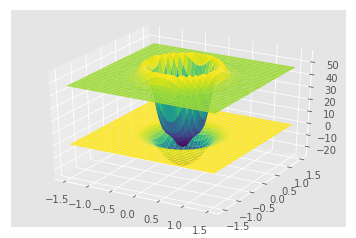

In [97]:
# Now to create a multi-dimensional vander matrix:
xlin = np.linspace(-1.5,1.5,41)
xx, yy = np.meshgrid(xlin,xlin)
rr = np.sqrt(xx*xx + yy*yy)

np.shape(rr)


from mpl_toolkits.mplot3d import Axes3D
axes = pyplot.subplot(projection='3d')
axes.plot_surface(xx, yy, rr, cmap=pyplot.get_cmap());

tmp1 = c1.coeffs['f_x']
tmp2 = c1.coeffs['g_x']

coeffs_all = np.array([coeffs_f,coeffs_g])

# Subtract 0.22 from rr
rr -= 0.22
rr[rr > 1] = 1
rr_ = rr.flatten()
np.shape(rr_)

yG = np.polynomial.chebyshev.chebval(rr_,coeffs_all[0])
print(len(yG))

yG = yG.reshape(np.shape(rr))

yF = np.polynomial.chebyshev.chebval(rr_,coeffs_all[1])
print(len(yF))

yF = yF.reshape(np.shape(rr))



from mpl_toolkits.mplot3d import Axes3D
axes = pyplot.subplot(projection='3d')
axes.plot_surface(xx, yy, yF, cmap=pyplot.get_cmap());
axes.plot_surface(xx, yy, yG, cmap=pyplot.get_cmap());



print(tmp2)
print(coeffs_g)

20
(2, 19)
(41, 41) (41, 41)


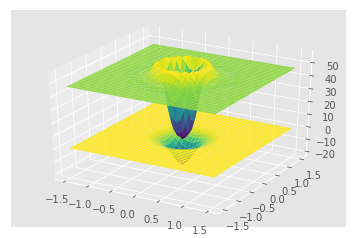

In [53]:
# So now to try to generalive the algorithm to create more of these:
# I can make a impact class later on with more methods and things, but first things first, get results


def get_coeffs(x,y,n):
    # Notes:
    #    x : The x input for a given f(x)
    #    y : The measured results of the x values
    #    n : n-1 is the heighest order of the cheby Shev polynomials to be used

    # Normalize x to be within range [-1,1]
    xNorm = (x/(0.5*max(x)))-1
    return np.polynomial.chebyshev.chebfit(xNorm,y,deg=n)

def visualize_3D(x,y,coeffs,rad_sym=True):#,vander=vander_chebyshev):
    # Notes:
    #    x/y    : The coordiantes for a meshgrid, that the impact will be interpolated over
    #    coeffs : Numpy array of [m,2] should be 2 sets of coeffs one for top one for bottom
    #             coeffs[:,0] - coeffs for top layer of impact
    #             coeffs[:,1] - coeffs for bottom layer of impact
    #    rad_sym: Boolean - Should this be done assuming radial symetry
    #    vander : The polynomial basis used for creating the coeffs
    
    # NOTE: I don't need to tell this method the number of dimensions to approximate with:
    #     Reason 1: I could just use len(coeffs)
    #     Reason 2: I would only need it for solving the matrix,
    #               but python uses it's own method that just uses len(coeffs).
    

    # Create meshgrids for x,y,r:
    xx, yy = np.meshgrid(x,y)
    rr = np.sqrt(xx*xx+yy*yy)
    
    # Just to make this more readable later on in life:
    coeffs_top = coeffs[0]
    coeffs_bot = coeffs[1]
    
    # Make sure all values of rr are withing range [0,1] - since we are using polynomials
    rr[rr>1] = 1
    # Make it a decent input for the vander_chebyshev method
    rr_ = rr.flatten()
    
    zTop = np.polynomial.chebyshev.chebval(rr_,coeffs_top)
    zTop = zTop.reshape(np.shape(rr))
    
    zBot = np.polynomial.chebyshev.chebval(rr_,coeffs_bot)
    zBot = zBot.reshape(np.shape(rr))
    
    print(np.shape(zTop),np.shape(zBot))
    
    # Now plot visuals in 3D:
    axes = pyplot.subplot(projection='3d')
    axes.plot_surface(xx, yy, zTop, cmap=pyplot.get_cmap());
    axes.plot_surface(xx, yy, zBot, cmap=pyplot.get_cmap());
    
print(len(x2))  

# TEsting this method:
x = np.linspace(-1.5,1.5,41)
c0 = np.array([get_coeffs(x2,f2,18),get_coeffs(x2,g2,18)])
print(np.shape(c0))
visualize_3D(x,x,c0)
    

In [113]:
class impact:
    def __init__(self,name):
        self.name = name
        self.data = {}     # Since there is data for f(x) and g(x) top and bottom functions
        self.coeffs = {}   # There will be coeffs for each function as well
        self.n = 0
    def add_data(self,x,f_x,g_x):
        self.data['f_x'] = f_x
        self.data['g_x'] = g_x
        self.data['x'] = x
        
    def get_coeffs(self,n):
        # Notes:
        #    x : The x input for a given f(x)
        #    y : The measured results of the x values
        #    n : n-1 is the heighest order of the cheby Shev polynomials to be used

        x = self.data['x']
        # Normalize x to be within range [-1,1]
        xNorm = (x/(0.5*max(x)))-1
        print(xNorm[0],xNorm[-1])
        self.n = n
        self.coeffs['f_x'] = np.polynomial.chebyshev.chebfit(xNorm,self.data['f_x'],deg=n)
        self.coeffs['g_x'] = np.polynomial.chebyshev.chebfit(xNorm,self.data['g_x'],deg=n)
    
    def visualize_3D(self,x,y): #coeffs,rad_sym=True):#,vander=vander_chebyshev):
        # Notes:
        #    x/y    : The coordiantes for a meshgrid, that the impact will be interpolated over
    
        # NOTE: I don't need to tell this method the number of dimensions to approximate with:
        #     Reason 1: I could just use len(coeffs)
        #     Reason 2: I would only need it for solving the matrix,
        #               but python uses it's own method that just uses len(coeffs).

        # Create meshgrids for x,y,r:
        xx, yy = np.meshgrid(x,y)
        rr = np.sqrt(xx*xx+yy*yy)

        # Just to make this more readable later on in life:
        coeffs_top = self.coeffs['f_x']
        coeffs_bot = self.coeffs['g_x']

        # Make sure all values of rr are withing range [0,1] - since we are using polynomials
        rr[rr>1] = 1
        # Make it a decent input for the vander_chebyshev method
        rr_ = rr.flatten()

        zTop = np.polynomial.chebyshev.chebval(rr_,coeffs_top)
        zTop = zTop.reshape(np.shape(rr))

        zBot = np.polynomial.chebyshev.chebval(rr_,coeffs_bot)
        zBot = zBot.reshape(np.shape(rr))

        print(np.shape(zTop),np.shape(zBot))

        # Now plot visuals in 3D:
        axes = pyplot.subplot(projection='3d')
        axes.plot_surface(xx, yy, zTop, cmap=pyplot.get_cmap());
        axes.plot_surface(xx, yy, zBot, cmap=pyplot.get_cmap());
        
        

20 20
-1.0 1.0
(41, 41) (41, 41)


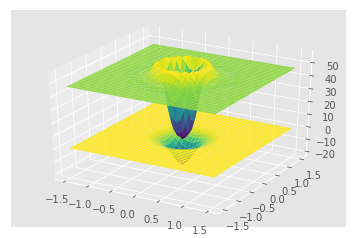

In [116]:
xSpace = np.linspace(-1.5,1.5,41)

print(len(x2),len(g2))

c1 = impact("cX18")
c1.add_data(x2,f2,g2)
c1.get_coeffs(18)
c1.visualize_3D(xSpace,xSpace)


